# Analysis

In [1]:
%matplotlib inline

import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Set path to load files from
# res_path = '/Users/tom/Documents/GitCode/Confidence_Scanner/scripts/results/'
res_path = '/Users/wdfox/Documents/GitCode/Confidence_Scanner/scripts/results/'

In [3]:
# Load files
dfs = []
for dat_type in ['Papers', 'PRs']:
    
    d1 = pd.read_csv(os.path.join(res_path, dat_type + '_readability.csv'))
    d2 = pd.read_csv(os.path.join(res_path, dat_type + '_analysis.csv'))
    d3 = pd.read_csv(os.path.join(res_path, dat_type + '_analysis_test.csv'))
    
    # Merge dataframes
    # df = pd.merge(d1, d2, on=['id', 'term'])
    df = pd.merge(d1, d3, on=['id', 'term'])
    df['dat_type'] = dat_type
    
    dfs.append(df)

In [4]:
# Combine into one joint df, with all data (papers and press releases)
df = pd.concat(dfs)

In [5]:
# Clean up df
df.set_index('id', inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)

# Drop currently empty columns
# df.drop('liu', axis=1, inplace=True)
# df.drop('subj', axis=1, inplace=True)

In [6]:
# Check out a few rows
df.head()

,term,fk,smog,consen,ar,vader,liu,subj,liwc,dat_type
id,,,,,,,,,,
29348041,autism,19.3,19.3,27th and 28th grade,22.2,-0.4153,0.0,3.0,4.0,Papers
29295738,autism,18.7,18.1,21th and 22th grade,22.0,2.7728,0.0,-4.0,4.0,Papers
29236210,autism,15.7,17.5,19th and 20th grade,18.6,-0.1074,-1.0,-4.0,0.0,Papers
29233794,autism,16.0,17.3,19th and 20th grade,20.0,2.1291,0.0,-2.0,2.0,Papers
29224173,autism,14.7,16.7,18th and 19th grade,18.2,-1.5108,-5.0,-8.0,6.0,Papers


In [7]:
# Check how many there are of each data type
df['dat_type'].value_counts()

PRs       272
Papers    254
Name: dat_type, dtype: int64

In [8]:
# Check how many documents there are for each term
df['term'].value_counts()

optogenetics     50
cognition        49
perception       49
dementia         48
stroke           48
autism           48
epilepsy         47
vaccines         47
diabetes         47
consciousness    47
hypertension     46
Name: term, dtype: int64

In [9]:
# Check how many of each document there are, split up by document type and term
df.groupby(['dat_type', 'term']).size()

dat_type  term         
PRs       autism           25
          cognition        25
          consciousness    25
          dementia         24
          diabetes         25
          epilepsy         25
          hypertension     25
          optogenetics     25
          perception       24
          stroke           25
          vaccines         24
Papers    autism           23
          cognition        24
          consciousness    22
          dementia         24
          diabetes         22
          epilepsy         22
          hypertension     21
          optogenetics     25
          perception       25
          stroke           23
          vaccines         23
dtype: int64

In [10]:
# Descriptive statistics
df.describe()

,fk,smog,ar,vader,liu,subj,liwc
count,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,13.926046,15.411027,17.053042,0.818263,-0.302281,-2.081749,4.218631
std,2.704526,2.213180,3.017375,2.852439,4.937888,4.505549,5.945764
min,5.300000,0.000000,8.900000,-13.307600,-18.000000,-17.000000,-12.000000
25%,12.300000,14.100000,15.200000,-0.659925,-3.000000,-5.000000,0.250000
50%,13.650000,15.300000,16.800000,0.719400,0.000000,-2.000000,3.000000
75%,15.500000,16.800000,18.900000,2.390900,2.000000,1.000000,7.000000
max,23.700000,23.300000,26.300000,11.421600,18.000000,15.000000,32.000000


In [11]:
# Check correlation between metrics
corrs = df.corr()
corrs

,fk,smog,ar,vader,liu,subj,liwc
fk,1.000000,0.881279,0.948760,0.053427,0.104011,0.197898,0.010744
smog,0.881279,1.000000,0.838847,0.048322,0.103296,0.185398,-0.007479
ar,0.948760,0.838847,1.000000,0.050531,0.102418,0.197368,0.036183
vader,0.053427,0.048322,0.050531,1.000000,0.732315,0.048790,0.033719
liu,0.104011,0.103296,0.102418,0.732315,1.000000,0.043750,0.076799
subj,0.197898,0.185398,0.197368,0.048790,0.043750,1.000000,-0.173462
liwc,0.010744,-0.007479,0.036183,0.033719,0.076799,-0.173462,1.000000


In [12]:
# Plot relations between metrics
pd.plotting.scatter_matrix(df);

AttributeError: module 'pandas' has no attribute 'plotting'

In [13]:
# Check the average scores for each measure across different terms
avgs = df.groupby(['term', 'dat_type']).mean()
avgs

fk       smog         ar     vader       liu  \
term          dat_type                                                        
autism        PRs       13.828000  15.336000  16.700000  1.104552 -2.080000   
              Papers    14.452174  15.952174  17.704348  0.614600 -0.217391   
cognition     PRs       13.336000  15.072000  16.224000  2.247956 -0.520000   
              Papers    14.837500  16.320833  17.908333  0.236642 -0.708333   
consciousness PRs       13.320000  14.744000  16.800000 -0.250560 -1.000000   
              Papers    15.100000  16.513636  18.404545  0.585773  0.409091   
dementia      PRs       14.012500  15.395833  16.800000  2.276017  1.083333   
              Papers    13.808333  15.812500  17.370833  0.867758 -0.666667   
diabetes      PRs       13.472000  14.984000  16.740000  1.777004 -0.880000   
              Papers    13.627273  15.340909  16.677273  0.279300 -1.227273   
epilepsy      PRs       13.512000  15.144000  16.848000  0.035080 -1.880000   
              Papers    14.931818  15.995455  18.236364 -0.064586 -0.500000   
hypertension  PRs       14.008000  15.376000  17.408000  0.452984  0.200000   
              Papers    12.261905  14.161905  15.295238  0.265729 -0.476190   
optogenetics  PRs       13.728000  15.212000  16.848000  2.261360  2.520000   
              Papers    16.860000  17.464000  19.824000 -0.124388 -0.040000   
perception    PRs       13.320833  14.887500  16.287500  2.898371  3.291667   
              Papers    13.588000  14.756000  16.352000  0.682040  0.520000   
stroke        PRs       13.612000  14.820000  17.028000 -0.133788 -3.160000   
              Papers    12.930435  14.691304  15.700000 -0.363239 -0.869565   
vaccines      PRs       13.166667  14.895833  15.970833  1.648613 -0.416667   
              Papers    14.617391  16.221739  18.000000  0.429148  0.043478   

                            subj      liwc  
term          dat_type                      
autism        PRs      -2.680000  5.760000  
              Papers   -1.260870  2.739130  
cognition     PRs      -2.160000  4.680000  
              Papers   -0.625000  3.541667  
consciousness PRs      -2.880000  5.040000  
              Papers   -0.772727  3.636364  
dementia      PRs      -1.375000  3.916667  
              Papers   -0.666667  3.375000  
diabetes      PRs      -2.600000  8.080000  
              Papers   -2.181818  2.818182  
epilepsy      PRs      -2.080000  4.720000  
              Papers   -1.363636  1.818182  
hypertension  PRs      -2.640000  6.240000  
              Papers   -2.190476  2.285714  
optogenetics  PRs      -4.160000  5.280000  
              Papers    1.000000  2.600000  
perception    PRs      -2.791667  5.583333  
              Papers   -0.960000  2.440000  
stroke        PRs      -3.120000  6.160000  
              Papers   -3.478261  2.956522  
vaccines      PRs      -4.375000  4.916667  
              Papers   -2.260870  3.086957

AttributeError: module 'pandas' has no attribute 'plotting'

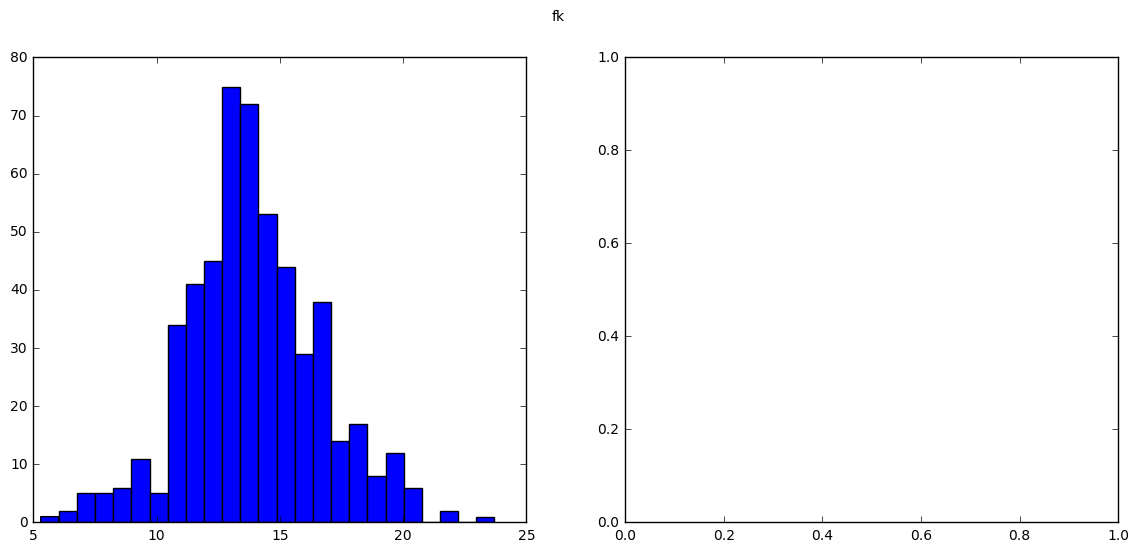

In [14]:
# Plot
for metric in ['fk', 'smog', 'ar', 'vader', 'liwc']:
    fig, ax = plt.subplots(1, 2, figsize=[14, 6])
    plt.suptitle(metric)
    ax[0].hist(df[metric], bins=25);
    pd.plotting.boxplot(df[metric], ax=ax[1]);

In [15]:
# Check the average differences between data types
df.groupby('dat_type').mean()

,fk,smog,ar,vader,liu,subj,liwc
dat_type,,,,,,,
PRs,13.575000,15.079044,16.699632,1.290870,-0.275735,-2.805147,5.496324
Papers,14.301969,15.766535,17.431496,0.312164,-0.330709,-1.307087,2.850394
